# TensorFlow

참고 : TensorFlow Machine Learning Cookbook

In [1]:
import tensorflow as tf
sess = tf.Session()

C:\Users\GIGABYTE\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 일괄 학습과 확률적 학습

> 역전파에 따라 텐서플로가 모델 변수를 갱신하는 작업은 데이터 하나의 관찰을 대상으로 할 수도 있고, 
대규모 데이터를 동시에 관찰한 내용을 대상으로 할 수도 있다. 
> 학습 사례 하나를 대상으로 적용하는 것은 학습 과정의 오류 가능성을 높일 수 있는 반면,
너무 큰 규모의 데이터를 일괄적으로 사용하는 것은 계산양이 너무 많을 수 있다. 
> 적절한 유형의 학습 방식 선택은 머신러닝 알고리즘의 정답 수렴에 중요한 요소다.

##### 일괄 비용 함수

In [3]:
# 일괄 작업 크기 선언
# - 계산 그래프에 얼마나 많은 관찰 데이터를 한 번에 투입할 것인지
batch_size = 20

# 모델의 데이터, 플레이스홀더, 변수 선언
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape=[None,1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))

# 계산 그래프 선언
my_output = tf.matmul(x_data, A)

# 비용 함수 선언
loss = tf.reduce_mean(tf.square(my_output - y_target))

# 변수 초기화
init = tf.global_variables_initializer()
sess.run(init)

# 최적화 함수 선언
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)

In [4]:
# 최적화하는 학습 루프 실행
loss_batch = []

for i in range(100):
    rand_index = np.random.choice(100, size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    
    sess.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    
    if (i+1) % 5 == 0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        temp_loss = sess.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})
        
        print('Loss = ' + str(temp_loss) + '\n')
        loss_batch.append(temp_loss)

Step #5 A = [[2.2460914]]
Loss = 59.84831

Step #10 A = [[3.672749]]
Loss = 39.590836

Step #15 A = [[4.832423]]
Loss = 27.432453

Step #20 A = [[5.7701287]]
Loss = 16.624468

Step #25 A = [[6.5423727]]
Loss = 11.564597

Step #30 A = [[7.1816955]]
Loss = 9.513028

Step #35 A = [[7.6963253]]
Loss = 5.8907156

Step #40 A = [[8.130435]]
Loss = 4.441726

Step #45 A = [[8.472184]]
Loss = 4.733609

Step #50 A = [[8.750924]]
Loss = 3.5080235

Step #55 A = [[8.979889]]
Loss = 2.5710447

Step #60 A = [[9.144497]]
Loss = 2.873115

Step #65 A = [[9.272122]]
Loss = 1.3740151

Step #70 A = [[9.413105]]
Loss = 2.0313504

Step #75 A = [[9.504414]]
Loss = 1.9117428

Step #80 A = [[9.586525]]
Loss = 1.2944453

Step #85 A = [[9.628228]]
Loss = 1.2548229

Step #90 A = [[9.702844]]
Loss = 0.95773494

Step #95 A = [[9.786766]]
Loss = 0.99229956

Step #100 A = [[9.826107]]
Loss = 0.69658273



##### 초기화

In [5]:
tf.reset_default_graph()
sess = tf.Session()

##### 확률적 비용 함수

In [6]:
# 모델의 데이터, 플레이스홀더, 변수 선언
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape=[1], dtype=tf.float32)
y_target = tf.placeholder(shape=[1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1]))

# 계산 그래프 선언
my_output = tf.multiply(x_data, A)

# 비용 함수 선언
loss = tf.reduce_mean(tf.square(my_output - y_target))

# 변수 초기화
init = tf.global_variables_initializer()
sess.run(init)

# 최적화 함수 선언
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)

In [7]:
# 최적화하는 학습 루프 실행
loss_stochastic = []

for i in range(100):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    
    sess.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    
    if (i+1) % 5 == 0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        temp_loss = sess.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})
        
        print('Loss = ' + str(temp_loss))
        loss_stochastic.append(temp_loss)

Step #5 A = [2.1385465]
Loss = 60.738655
Step #10 A = [3.5388422]
Loss = 44.12583
Step #15 A = [4.7507124]
Loss = 24.933949
Step #20 A = [5.703273]
Loss = 16.85507
Step #25 A = [6.451173]
Loss = 3.6604671
Step #30 A = [7.05044]
Loss = 14.849469
Step #35 A = [7.601813]
Loss = 13.243421
Step #40 A = [8.058705]
Loss = 9.75209
Step #45 A = [8.377281]
Loss = 6.2715335
Step #50 A = [8.644506]
Loss = 5.1311274
Step #55 A = [8.810774]
Loss = 0.005935412
Step #60 A = [9.016348]
Loss = 8.501206
Step #65 A = [9.185207]
Loss = 4.688313
Step #70 A = [9.41895]
Loss = 0.13253859
Step #75 A = [9.563299]
Loss = 0.9098585
Step #80 A = [9.508419]
Loss = 0.035891764
Step #85 A = [9.662776]
Loss = 0.98210216
Step #90 A = [9.5481205]
Loss = 3.5808666
Step #95 A = [9.673694]
Loss = 2.7797375
Step #100 A = [9.812989]
Loss = 2.7802463


##### 시각화

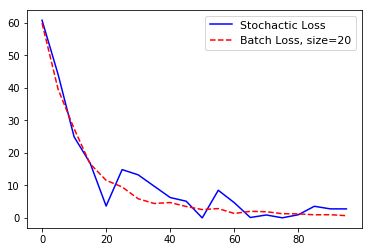

In [8]:
plt.plot(range(0, 100, 5), loss_stochastic, 'b-', label='Stochactic Loss')
plt.plot(range(0, 100, 5), loss_batch, 'r--', label='Batch Loss, size=20')
plt.legend(loc='upper right', prop={'size':11})
plt.show()

<table>
    <tr> <td>학습 유형</td> <td>장점</td> <td>단점</td> </tr>
    <tr> <td>확률적</td> <td>임의성으로 지역 최솟값에서 탈피할 수 있다.</td> <td>일반적으로 수렴에 더 많은 반복이 필요하다.</td> </tr>
    <tr> <td>일괄</td> <td>최솟값을 더 빨리 찾아낸다.</td> <td>계산을 위한 자원이 더 많이 필요하다.</td> </tr>
</table>

### 모든 요소 조합

In [9]:
# 데이터 로드
from sklearn import datasets
iris = datasets.load_iris()

binary_target = np.array([1. if x==0 else 0. for x in iris.target])
iris_2d = np.array([[x[2], x[3]] for x in iris.data])

# 일괄 작업 크기, 데이터,  플레이스홀더, 모델 변수 선언
batch_size = 20
x1_data = tf.placeholder(shape=[None,1], dtype=tf.float32)
x2_data = tf.placeholder(shape=[None,1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

# 선형 모델 정의 : x1 - x2 * A - b
my_mult = tf.matmul(x2_data, A)
my_add = tf.add(my_mult, b)
my_output = tf.subtract(x1_data, my_add)

# 시그모이드 교차 엔트로피 비용 함수 선언
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=my_output, labels=y_target)

# 최적화 방식 선언
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(xentropy)

# 변수 초기화
init = tf.global_variables_initializer()
sess.run(init)

# 선형 모델 학습
for i in range(1000):
    rand_index = np.random.choice(len(iris_2d), size=batch_size)
    rand_x = iris_2d[rand_index]
    rand_x1 = np.array([[x[0]] for x in rand_x])
    rand_x2 = np.array([[x[1]] for x in rand_x])
    rand_y = np.array([[y] for y in binary_target[rand_index]])
    
    sess.run(train_step, feed_dict={x1_data:rand_x1, x2_data:rand_x2, y_target:rand_y})
    
    if (i+1) % 200 == 0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ', b = ' + str(sess.run(b)))

Step #200 A = [[8.616538]], b = [[-3.4253418]]
Step #400 A = [[10.110376]], b = [[-4.7298837]]
Step #600 A = [[11.113556]], b = [[-5.4402413]]
Step #800 A = [[11.868018]], b = [[-5.8714004]]
Step #1000 A = [[12.452268]], b = [[-6.2674046]]


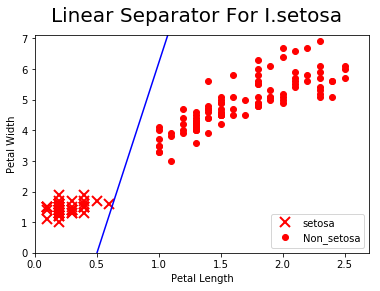

In [10]:
[[slope]] = sess.run(A)
[[intercept]] = sess.run(b)

x = np.linspace(0, 3, num=50)
ablineValues = []

for i in x:
    ablineValues.append(slope * i + intercept)
    
setosa_x = [a[1] for i, a in enumerate(iris_2d) if binary_target[i]==1]
setosa_y = [a[0] for i, a in enumerate(iris_2d) if binary_target[i]==1]

non_setosa_x = [a[1] for i, a in enumerate(iris_2d) if binary_target[i]==0]
non_setosa_y = [a[0] for i, a in enumerate(iris_2d) if binary_target[i]==0]

plt.plot(setosa_x, setosa_y, 'rx', ms=10, mew=2, label='setosa')
plt.plot(non_setosa_x, non_setosa_y, 'ro', label='Non_setosa')
plt.plot(x, ablineValues, 'b-')
plt.xlim([0.0, 2.7])
plt.ylim([0.0, 7.1])
plt.suptitle('Linear Separator For I.setosa', fontsize=20)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc='lower right')
plt.show()